In [86]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Vinay Dwivedi\\Downloads\\Video\\01.12.19\\P2_Bankrupcy\\Qualitative_Bankruptcy.data.txt')
df.columns = ["IndRisk", "MgmtRisk", "FinFlex", "Cred", "Comp", "OperRisk", "Class"]
df.info()

# Adding columns to the headerless data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
IndRisk     249 non-null object
MgmtRisk    249 non-null object
FinFlex     249 non-null object
Cred        249 non-null object
Comp        249 non-null object
OperRisk    249 non-null object
Class       249 non-null object
dtypes: object(7)
memory usage: 13.7+ KB


In [87]:
for col in list(df):
    print(col)
    print(df[col].unique())
    
# This shows that all columns are categorical in nature and that the target column in Class with two values i.e. B & NB

IndRisk
['N' 'A' 'P']
MgmtRisk
['N' 'A' 'P']
FinFlex
['A' 'P' 'N']
Cred
['A' 'P' 'N']
Comp
['A' 'P' 'N']
OperRisk
['N' 'A' 'P']
Class
['NB' 'B']


In [88]:
from sklearn import preprocessing
print(df.head())
print()
df_num = df.apply(preprocessing.LabelEncoder().fit_transform)

# Since PCA can not be applied on non-numeric columns hence all categorical columns are converted to numeric equivalent 
# A->0, N->1, P->2, NB->1 & B->0

  IndRisk MgmtRisk FinFlex Cred Comp OperRisk Class
0       N        N       A    A    A        N    NB
1       A        A       A    A    A        A    NB
2       P        P       P    P    P        P    NB
3       N        N       P    P    P        N    NB
4       A        A       P    P    P        A    NB



In [89]:
df_dpn = df_num['Class']
df_ind = df_num.drop('Class',axis=1)
df_ind.head()

,IndRisk,MgmtRisk,FinFlex,Cred,Comp,OperRisk
0,1,1,0,0,0,1
1,0,0,0,0,0,0
2,2,2,2,2,2,2
3,1,1,2,2,2,1
4,0,0,2,2,2,0


In [90]:
# Since PCA needs to be done on whole independent data and before splitting it between train & test data, hence done so here

import numpy as np

train_cov_matrix = np.cov(df_ind.T)
print('Covariance Matrix \n%s', train_cov_matrix)
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df_ind.T))

print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Covariance Matrix 
%s [[ 6.45096515e-01  6.02247700e-02  4.38366369e-02 -2.81286436e-02
   4.14885348e-02  1.01486592e-01]
 [ 6.02247700e-02  5.23157145e-01 -6.10506542e-03  3.88651380e-04
  -6.79168286e-02  1.31752818e-01]
 [ 4.38366369e-02 -6.10506542e-03  5.20047934e-01 -1.53517295e-02
   7.78760202e-02 -3.08492033e-02]
 [-2.81286436e-02  3.88651380e-04 -1.53517295e-02  6.24854256e-01
   5.06704236e-02  3.52701127e-02]
 [ 4.14885348e-02 -6.79168286e-02  7.78760202e-02  5.06704236e-02
   5.67722503e-01 -3.64360668e-02]
 [ 1.01486592e-01  1.31752818e-01 -3.08492033e-02  3.52701127e-02
  -3.64360668e-02  5.37213370e-01]]
Eigen Vectors 
%s [[-0.63742116 -0.135675    0.34018148 -0.45042626 -0.45643781 -0.2198723 ]
 [-0.49475998 -0.65232564 -0.172882    0.48888603  0.22516186  0.10044016]
 [ 0.0150906   0.25698117  0.37614681  0.74030501 -0.45633154 -0.18962213]
 [ 0.03360812 -0.06214063  0.34017621 -0.03151728 -0.18627127  0.91847638]
 [ 0.14985979 -0.168051   -0.67429116 -0.00859281 -0.

In [91]:
train_eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
train_eig_pairs.sort(reverse = True)
train_eig_pairs

[(0.7733125097280167,
  array([-0.63742116, -0.49475998,  0.0150906 ,  0.03360812,  0.14985979,
         -0.57016808])),
 (0.6869806852541946,
  array([-0.45643781,  0.22516186, -0.45633154, -0.18627127, -0.6973137 ,
          0.10855784])),
 (0.6487282521121965,
  array([-0.2198723 ,  0.10044016, -0.18962213,  0.91847638,  0.09117075,
          0.23173354])),
 (0.48514362297902164,
  array([-0.45042626,  0.48888603,  0.74030501, -0.03151728, -0.00859281,
          0.09480481])),
 (0.4399737060228717,
  array([ 0.34018148, -0.172882  ,  0.37614681,  0.34017621, -0.67429116,
         -0.37750964])),
 (0.38395294562931187,
  array([-0.135675  , -0.65232564,  0.25698117, -0.06214063, -0.168051  ,
          0.67669908]))]

In [92]:
train_eigvalues_sorted = [train_eig_pairs[index][0] for index in range(len(eigenvalues))]
train_eigvectors_sorted = [train_eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %train_eigvalues_sorted)

Eigenvalues in descending order: 
[0.7733125097280167, 0.6869806852541946, 0.6487282521121965, 0.48514362297902164, 0.4399737060228717, 0.38395294562931187]


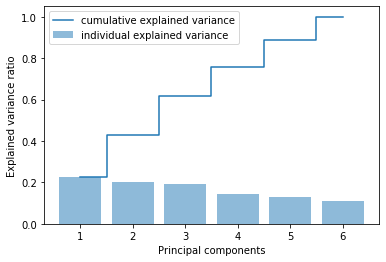

In [93]:
import matplotlib.pyplot as plt 
tot = sum(eigenvalues)

var_explained = [(i / tot) for i in train_eigvalues_sorted] 
cum_var_exp = np.cumsum(var_explained)

plt.bar(range(1,7), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# The below output shows that there is no advantage in applying PC on the given data, as each resultant PC dimension has 
# substantial variance

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


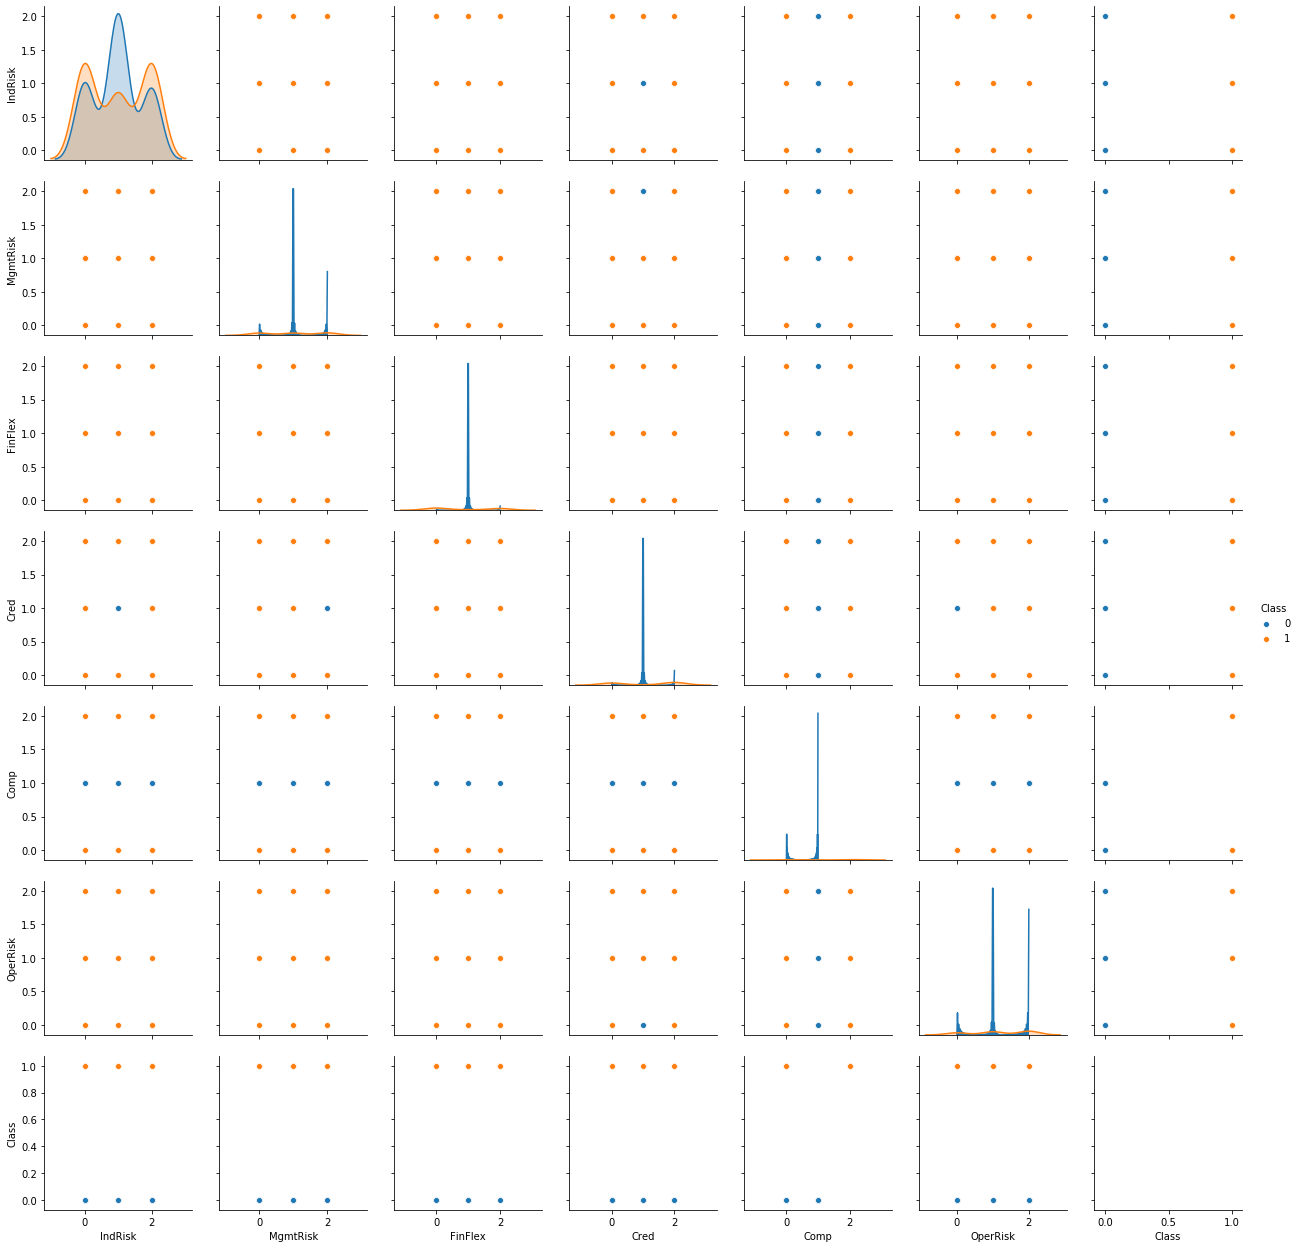

In [94]:
import seaborn as sns
sns.pairplot(df_num, diag_kind='kde', hue='Class')

# The below plot clearly shows that there are three clusters each for the two types of Class based on Industrial Risk.

In [95]:
P_reduce = np.array(train_eigvectors_sorted[0:5])   # All 6 dimension space

X_std_4D = np.dot(df_ind,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot



from sklearn import model_selection

test_size = 0.20 # taking 80:20 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, df_dpn, test_size=test_size, random_state=seed)

In [101]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 9)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(X_train)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,497.282493
1,3,432.701627
2,4,376.535291
3,5,338.581866
4,6,311.957393
5,7,287.304584
6,8,265.355809


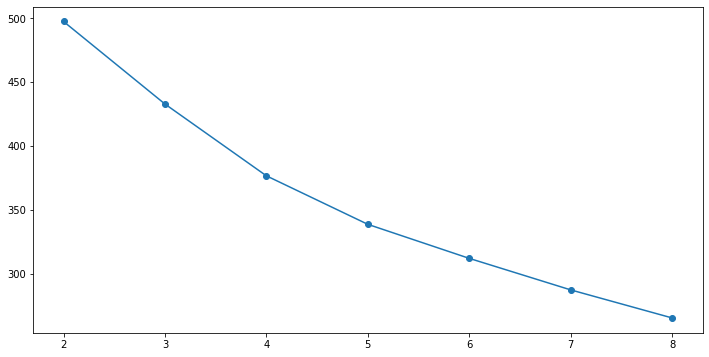

In [102]:
# Elbow plot -> There is a very mild but elbow appearing for 6 clusters

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [103]:
cluster = KMeans( n_clusters = 6, random_state = 2354 )
cluster.fit(X_train)
X_train_copy = X_train.copy(deep = True)

centroids = cluster.cluster_centers_
centroids

array([[-2.08403526e-01, -1.28975766e+00,  1.06760632e+00,
         8.17011242e-01, -3.28048006e-01],
       [-1.80587217e+00, -2.28921158e+00,  1.94914023e+00,
         1.21838413e+00, -3.60685174e-01],
       [-1.51796074e+00, -1.30226682e+00,  6.38853821e-01,
         8.08206441e-01,  2.08507275e-02],
       [-1.73485662e+00, -2.38876463e+00,  7.10980870e-01,
         5.96673666e-02,  2.17253546e-03],
       [-2.08631943e+00, -3.36137025e-03,  1.66418040e+00,
         7.90446210e-01, -2.74678401e-01],
       [-1.86205596e+00, -1.59783088e+00,  1.97645273e-01,
         1.29314608e+00, -1.13983104e+00]])

In [104]:
centroid_df = pd.DataFrame(centroids, columns = list(X_train) )
centroid_df

,0,1,2,3,4
0,-0.208404,-1.289758,1.067606,0.817011,-0.328048
1,-1.805872,-2.289212,1.949140,1.218384,-0.360685
2,-1.517961,-1.302267,0.638854,0.808206,0.020851
3,-1.734857,-2.388765,0.710981,0.059667,0.002173
4,-2.086319,-0.003361,1.664180,0.790446,-0.274678
5,-1.862056,-1.597831,0.197645,1.293146,-1.139831


In [109]:
prediction=cluster.predict(X_train)
X_train_copy["GROUP"] = prediction 
X_train_copy.head(20)

,0,1,2,3,4,GROUP
240,-2.073959,-1.354077,1.164060,0.928264,-0.545688,2
109,0.000000,0.000000,0.000000,0.000000,0.000000,0
46,-1.162571,-2.120951,2.072664,2.472967,-0.639210,1
120,-1.672168,-1.035381,-0.266943,1.613875,0.542083,2
246,-0.866370,-1.006197,1.152199,1.283886,-0.508360,0
206,-0.933623,-1.571192,0.700593,0.738655,0.209331,2
77,-0.960032,-2.763835,-0.447025,-0.177733,-0.292073,3
70,-3.037763,-2.012606,2.243897,0.186309,-1.088650,1
31,-2.879757,-1.383261,-0.255082,1.258253,0.504755,2
197,-0.967231,-1.384921,-0.217884,0.770172,-0.130845,2


In [110]:
predictionTest=cluster.predict(X_test)
X_test_copy = X_test.copy(deep = True)
X_test_copy["GROUP"] = predictionTest 
X_test_copy.head(20)

,0,1,2,3,4,GROUP
148,-2.073959,-1.354077,1.164060,0.928264,-0.545688,2
219,-0.941778,-1.122801,1.283492,0.889805,-0.712987,0
94,-2.504630,-2.661285,-0.204034,1.635149,-0.639199,5
84,-1.286678,-1.594953,1.475103,1.370098,-1.560161,5
3,-1.305232,-2.802551,1.752351,1.533654,-0.126146,1
121,-1.635133,-0.495261,1.949254,0.070230,0.470142,4
97,-3.037763,-2.012606,2.243897,0.186309,-1.088650,1
236,-1.998551,-1.237473,1.032767,1.322346,-0.341060,2
138,-1.905581,-1.781330,2.363329,0.147849,-1.255950,1
122,-1.635133,-0.495261,1.949254,0.070230,0.470142,4


In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_copy, y_train)
model.score(X_train_copy, y_train) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6633165829145728

In [112]:
model.score(X_test_copy, y_test) 

0.64

In [114]:
from sklearn import metrics
test_pred = model.predict(X_test_copy)
print(metrics.confusion_matrix(y_test, test_pred))

[[ 7  9]
 [ 9 25]]
